In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the Gaussian function
def gaussian_function(x):
    return np.exp(-x**2)

# Generate training data
x_train = np.linspace(-3, 3, 100).reshape(-1, 1)  # Inputs
y_train = gaussian_function(x_train)  # Outputs

# Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Define a simple neural network
class GaussianNN(nn.Module):
    def __init__(self):
        super(GaussianNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

# Initialize model, loss function, and optimizer
model = GaussianNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}")


Epoch [0/1000], Loss: 0.272403
Epoch [100/1000], Loss: 0.000111
Epoch [200/1000], Loss: 0.000010
Epoch [300/1000], Loss: 0.000004
Epoch [400/1000], Loss: 0.000671
Epoch [500/1000], Loss: 0.000004
Epoch [600/1000], Loss: 0.000003
Epoch [700/1000], Loss: 0.000428
Epoch [800/1000], Loss: 0.000004
Epoch [900/1000], Loss: 0.000003


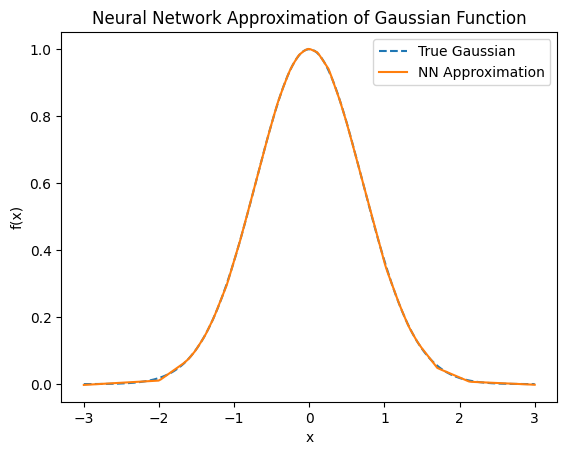

In [3]:
# Test the model
x_test = np.linspace(-3, 3, 200).reshape(-1, 1)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_pred = model(x_test_tensor).detach().numpy()

# Plot results
plt.plot(x_test, gaussian_function(x_test), label="True Gaussian", linestyle="dashed")
plt.plot(x_test, y_pred, label="NN Approximation")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Neural Network Approximation of Gaussian Function")
plt.show()